In [1]:
class FinancialInstrument():
    pass

In [69]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

In [3]:
stock = FinancialInstrument()

In [4]:
stock

In [157]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
        
    def __repr__(self):
        return "FinancialInstument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
        
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace=True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize=15)
        
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize=15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}". format(self._ticker), fontsize=15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price/ resampled_price.shift(1))
            return resampled_returns.mean()
        
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price/ resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 248, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(248), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))
        

In [158]:
stock = FinancialInstrument("^NSEBANK", "2010-01-01", "2023-6-21")

[*********************100%***********************]  1 of 1 completed


In [159]:
stock.start

'2010-01-01'

In [160]:
stock._ticker

'^NSEBANK'

In [161]:
stock.data

,price,log_returns
Date,,
2010-01-04,9112.349609,NaN
2010-01-05,9192.150391,0.008719
2010-01-06,9223.000000,0.003350
2010-01-07,9192.950195,-0.003263
2010-01-08,9160.700195,-0.003514
...,...,...
2023-06-14,43988.000000,-0.002086
2023-06-15,43443.601562,-0.012453
2023-06-16,43938.148438,0.011319


In [162]:
stock

FinancialInstument(ticker = ^NSEBANK, start = 2010-01-01, end = 2023-6-21)

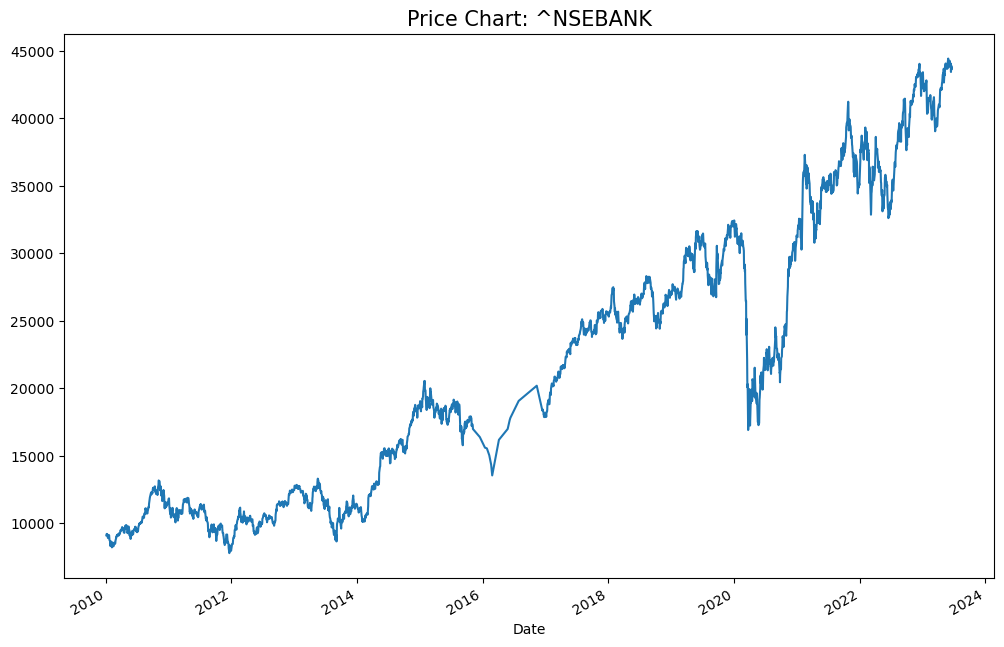

In [163]:
stock.plot_prices()

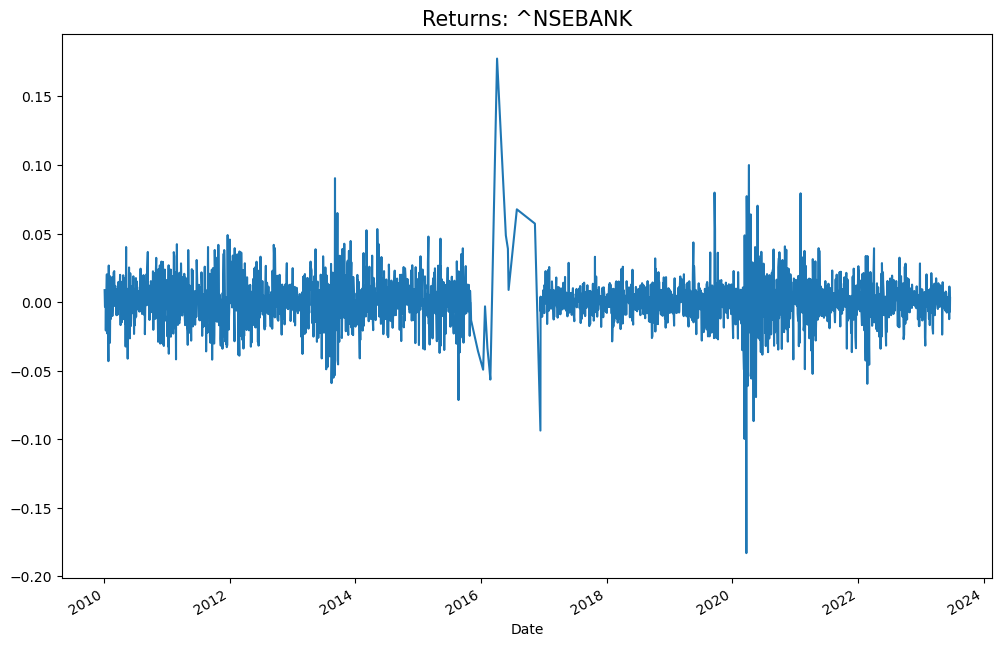

In [164]:
stock.plot_returns()

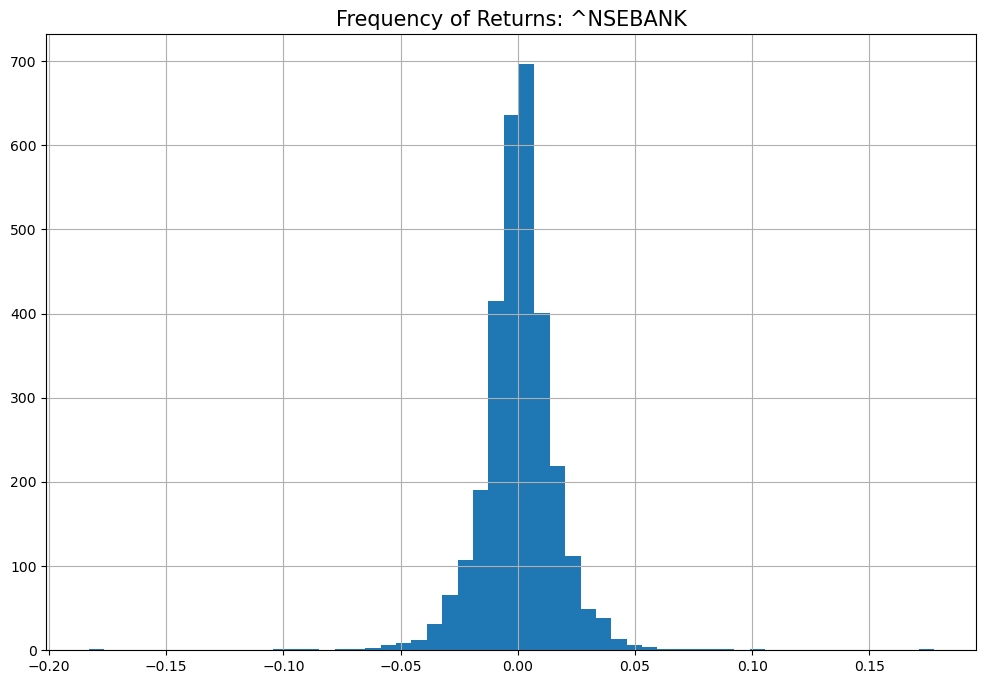

In [165]:
stock.plot_returns(kind="hist")

In [166]:
stock.set_ticker("^NSEI")

[*********************100%***********************]  1 of 1 completed


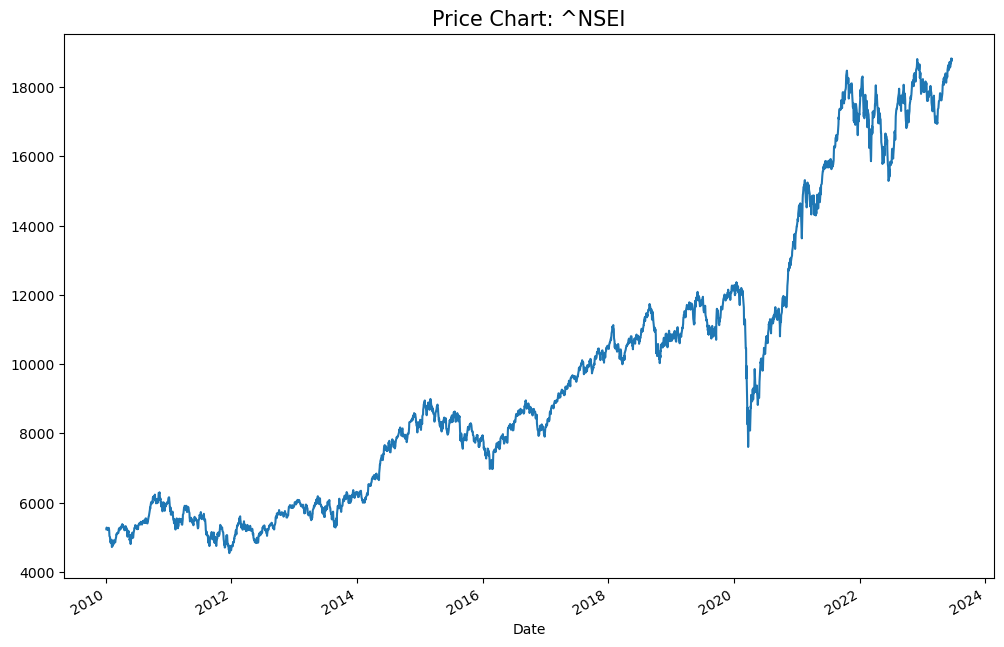

In [167]:
stock.plot_prices()

In [168]:
stock.mean_return()

0.00038750010742757463

In [169]:
stock.mean_return("m")

0.008379997256334863

In [170]:
stock.std_returns()

0.010867289509150073

In [171]:
stock.std_returns("m")

0.04949150578080959

In [172]:
stock.annualized_perf()

Return: 0.096 | Risk: 0.171
